# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



<h1> Business Understanding</h1>

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



<h2>Data Understanding</h2>

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<h4>Response:</h4>
As stated on the mentioned paper, this dataset contains information from a total of 79,354 contacts obtained from 17 campaigns that took place between May 2008 and November 2010.  

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [72]:
# Package imports
import pandas as pd

In [2]:
# Read csv file containing source data and assing it to the "contacts_df" variable 
contacts_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
# Explore first five records of the dataframe
contacts_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h2>Data Description</h2>

In [4]:
# Package imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

<h4>Observations:</h4>
<ul>
    <li>All columns appeared to be properly described</li>
</ul>

Next, we proceed to exploring the dataframe features further:

In [5]:
# Explore high level information on the dataframe using the Pandas dataframe info() method. 
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Get summary statistics from the numeric features by using the Pandas decribe() method
contacts_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: >

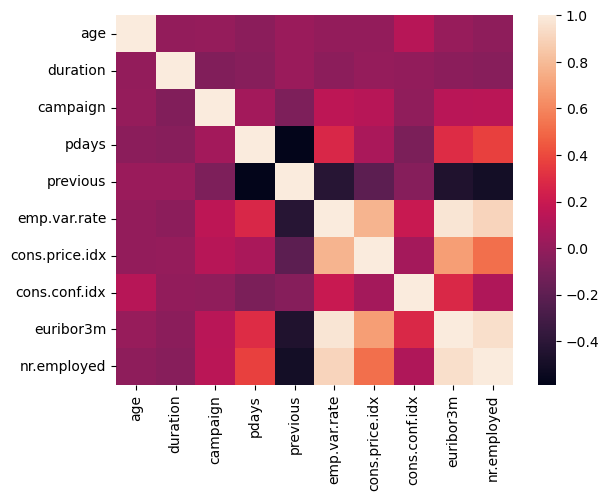

In [7]:
# Generate a correlation map of the numerical features using the Seaborn library
sns.heatmap(contacts_df.corr(numeric_only=True))

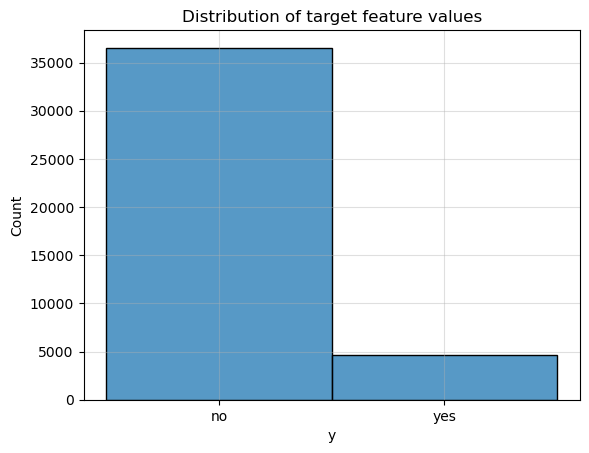

In [8]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(contacts_df['y']).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

<h4>Observations: </h4>

* The dataset contains a of 41,188 entries with no "null" values. Notice that there's a difference of 38,166 records from the total of 79,354 reported by the paper 79,354.

* From the 21 columns present on the dataset, 10 columns contain numerical features while 11 contain categorical data.   

* Based on the feature descriptions, we may consider converting the datatype of "month" (feature 8) and "day_of_week " (feature 9) to a numeric value.

* The target data consists of binary data ("yes" and "no").

* The disporportionate distribution of "yes" vs "no" values in the target feature indicates a highly imbalanced dataset.  

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

<h4>Business Objective</h4>
The goal of this analysis is to produce a model that can predict if a person contacted by the bank will turn into a deposit. Since there is no need to predict the amount of money that will be deposited, this is mainly a data classification problem. 

<h1> Data Preparation</h1>

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# Package imports 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline

In [10]:
# Create a subset of the data that contains only columns 1 through 8
contacts_subset_df = contacts_df.iloc[:,1:8]

# Verify the subset of data
contacts_subset_df.head()

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
1,services,married,high.school,unknown,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone


Next, using the data subset, we proceed to transform the categorical data into numerical data using the OneHotEncoder preprocessor, and then normalizing the data by using the StandardScaler preprocessor.

In [11]:
# Instantate column transformer to encode and scale the data subset  
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), contacts_subset_df.columns),
                                     remainder = StandardScaler())


Now, we proceed to train the column transformer with the contact data subset and create the X and y variables:

In [12]:
# Create dataframe with encoded/scaled values
X = transformer.fit_transform(contacts_subset_df)
# Set target data series 
y = contacts_df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
# Package imports
from sklearn.model_selection import train_test_split

Using the train_test_split model selector, we proceed to create the train and test data. By default, this model splits the data with train_size ratio of **0.25** and shuffles the data **(shuffle=True)**. We set the **random_state=44** to control the randomness of the data and thus generate reproductible oututs:

In [14]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=44)

<h1>Data Modeling</h1>

In [15]:
# Imports
from time import perf_counter_ns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


To make the modeling process more efficient, we definr a function named "train_model" that will help us run several modeling iterations using different models and variations, as well as obtaining model performance metrics:   

In [16]:
# Define a function that trains the model and provide performance results
def train_model(model, X_train, y_train, X_test, y_test, display_confusion_matrix = True):
    #Sets timer 
    start_time = perf_counter_ns()
    # Fit model
    model.fit(X_train, y_train)
    # Ends timer
    end_time = perf_counter_ns()
    # Calculates fit process duration
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = model.predict(X_test)
    
    # Calculate score for train and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Calculates precison and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Display confusion matrix (if required. Dafaults to "True") 
    if(display_confusion_matrix):
        ConfusionMatrixDisplay.from_predictions(y_test, prediction_test)
    
    # Return dictionary with model and results
    return {
        'model' : model, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

To create a baseline clasifier, we're going to leverage the DummyClassifier class. As stated by the Sklearn documentation "This classifier serves as a simple baseline to compare against other more complex classifiers".


In [17]:
from sklearn.dummy import DummyClassifier

We'll make use of the **train_model** custom function we have previously defined: 

{'model': DummyClassifier(random_state=42, strategy='stratified'),
 'fit_duration': 13999565,
 'train_score': 0.8035026383088926,
 'test_score': 0.798873458288822,
 'precision': 0.8810093539264738,
 'recall': 0.8923653189379751}

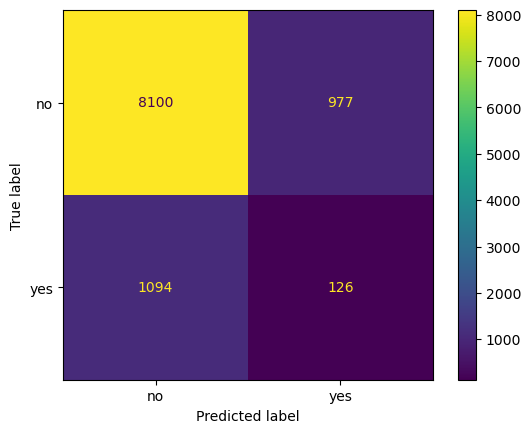

In [18]:
# Create a baseline classifier using the DummyClassifier  
dummy_clf = train_model(DummyClassifier(strategy='stratified', random_state=42), X_train, y_train, X_test, y_test)

# Output dummy classifier
dummy_clf

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
from sklearn.linear_model import LogisticRegression

For this stage in the process, we're going to use the default settings of the LogisticRegression model, except we'll set the **max_iter=1000** parameter to adjust the minimum number of iterations for the data to converge:    

{'model': LogisticRegression(max_iter=1000),
 'fit_duration': 298091239,
 'train_score': 0.8892881421773332,
 'test_score': 0.8815188889967952,
 'precision': 0.8815188889967952,
 'recall': 1.0}

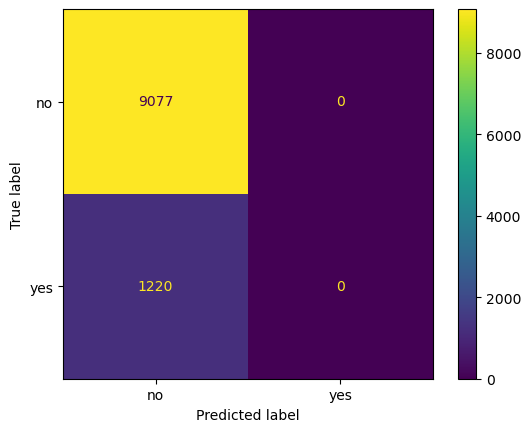

In [20]:
# Train LogisticRegression model by leveraging the train_model custom function 
lrg = train_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

# Display model output
lrg

### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
# Print the accuracy of the model on the Train data
print("Accuracy on Train Data ", lrg['train_score'])
# Print the accuracy of the model on the Test data
print("Accuracy on Test Data ", lrg['test_score'])

Accuracy on Train Data  0.8892881421773332
Accuracy on Test Data  0.8815188889967952


Also notice that even though the accuracy (score) of this model is higher than the baseline (dummy) model, the confusion matrix helps us visualize that the model was not able to predict any of the true positives (TP) and neither produced any false negatives (FN). This is an indication that the model might be overfitted. Another metric that gives us that indication is the "recall=1.0" score. 

<h1>Evaluation</h1>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
# Package imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<i>Note: The following sections will be described using code comments. Observations about the findinds will be provided at the end of this **Model Comparisons** stage</i>

{'model': KNeighborsClassifier(),
 'fit_duration': 29461882,
 'train_score': 0.8698326373377359,
 'test_score': 0.8559774691657764,
 'precision': 0.8829937462174703,
 'recall': 0.9644155558003745}

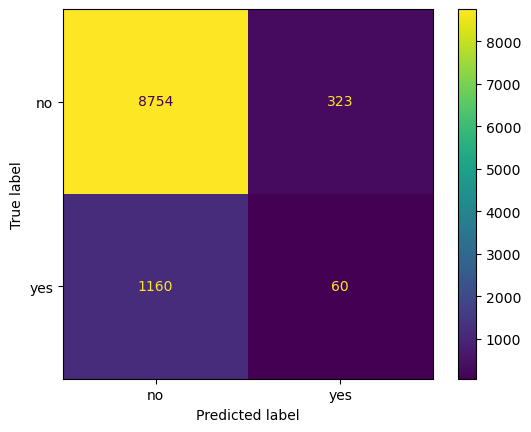

In [23]:
# Instantiate and train KNN model by leveraging the train_model custom function  
knn = train_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

# Display model output
knn

{'model': DecisionTreeClassifier(),
 'fit_duration': 326415456,
 'train_score': 0.8935936033148814,
 'test_score': 0.8778284937360397,
 'precision': 0.8826465694430851,
 'recall': 0.993500055084279}

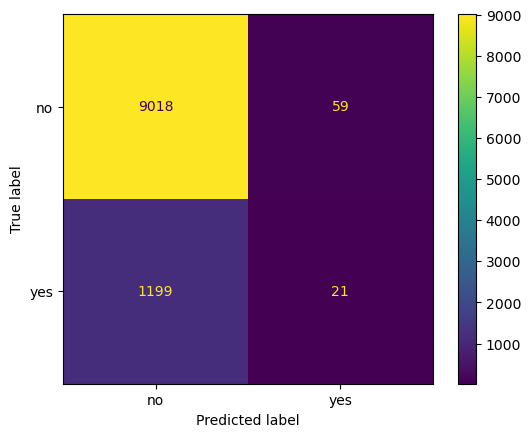

In [24]:
# Instantiate and train KNN model by leveraging the train_model custom function  
dtree = train_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

# Display model output
dtree

{'model': SVC(),
 'fit_duration': 20368962004,
 'train_score': 0.8892881421773332,
 'test_score': 0.8815188889967952,
 'precision': 0.8815188889967952,
 'recall': 1.0}

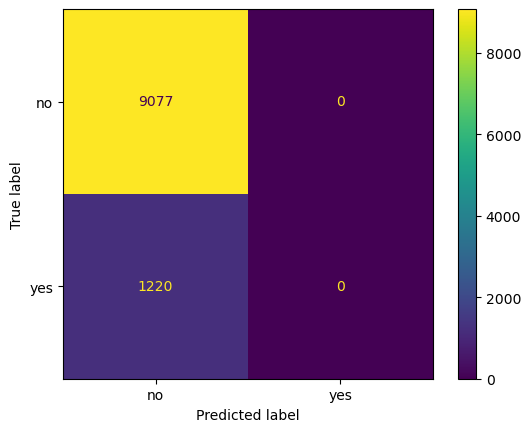

In [25]:
# Instantiate and train KNN model by leveraging the train_model custom function  
svm = train_model(SVC(), X_train, y_train, X_test, y_test)

# Display model output
svm

In [26]:
# Create results array 
results = [
    ['DummyClassifier', dummy_clf['fit_duration'], dummy_clf['train_score'], dummy_clf['test_score'], dummy_clf['precision'], dummy_clf['recall']],
    ['LogisticRegression', lrg['fit_duration'], lrg['train_score'], lrg['test_score'], lrg['precision'], lrg['recall']],
    ['KNN', knn['fit_duration'], knn['train_score'], knn['test_score'], knn['precision'], knn['recall']],
    ['DecisionTree', dtree['fit_duration'], dtree['train_score'], dtree['test_score'], dtree['precision'], dtree['recall']],
    ['SVM', svm['fit_duration'], svm['train_score'], svm['test_score'], svm['precision'], svm['recall']],
]

In [27]:
# Create Pandas dataframe to summary the resuuls obtained during the modeling process  
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (ns)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'])

In [28]:
# Output results 
results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,13999565,0.803503,0.798873,0.881009,0.892365
1,LogisticRegression,298091239,0.889288,0.881519,0.881519,1.000000
2,KNN,29461882,0.869833,0.855977,0.882994,0.964416
3,DecisionTree,326415456,0.893594,0.877828,0.882647,0.993500
4,SVM,20368962004,0.889288,0.881519,0.881519,1.000000


<h4>Observations:</h4>
<ul>
    <li>
        As it can be seen on the table, the accuracy score was the highest on the LogisticRegression model and the SVM model. In fact, the score was exactly the same for these models. Aside from the base classifier, the model that resulted in the lowest accuracy was the KNN model.   
    </li>
     <li>
        As it relates to precision,  the model that produced the highest score was the KNN model. On the other hand, aside from the base classifier, the models with the lowest precision were the LogisticRegression model and the SVM model (same scores).   
    </li>
    <li>
        As it relates to recall, the models with the highest recall were also the LogisticRegression model and the SVM model (same scores). However, as mentioned before, this is an indication of overtiffing. The baseline classifier offered the lowest recall, followed by the KNN model. 
    </li>
    <li>
        As per train duration, the least duration was given by the baseline classifier, followed by the KNN model. On the the SVM model took a significant amount of time when compared to the rest of the models.     
    </li>
</ul>

To help visualize the observations presented above, please refer to the following graphs:

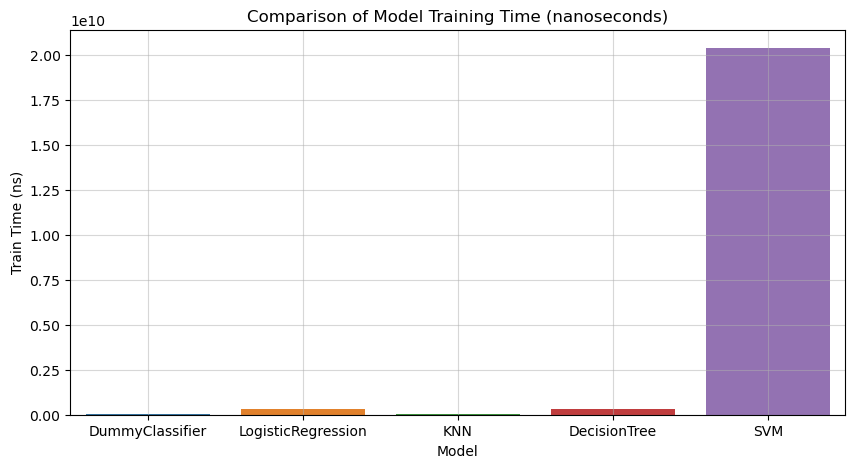

In [29]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Train Time (ns)').set_title('Comparison of Model Training Time (nanoseconds)')
# Display grid and set transparency
plt.grid(alpha=0.5)

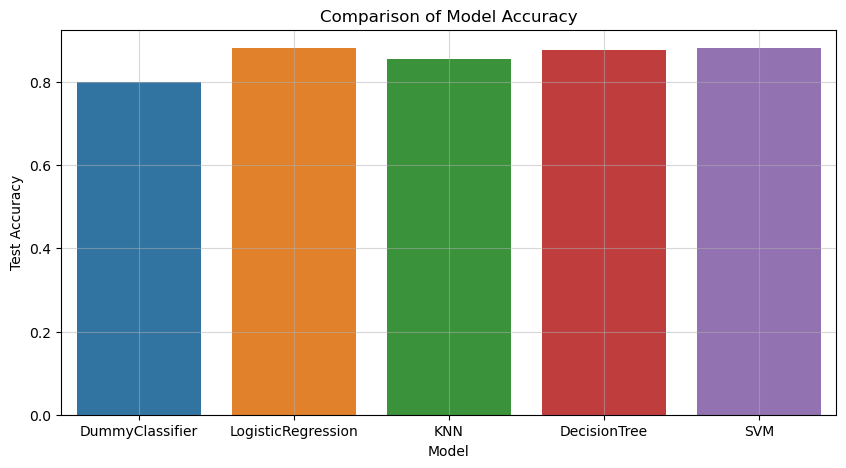

In [30]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Test Accuracy').set_title('Comparison of Model Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

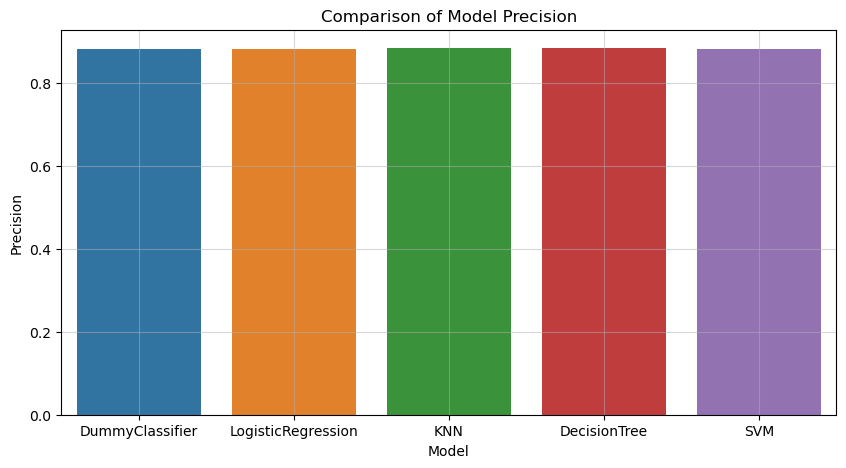

In [31]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Precision').set_title('Comparison of Model Precision')
# Display grid and set transparency
plt.grid(alpha=0.5)

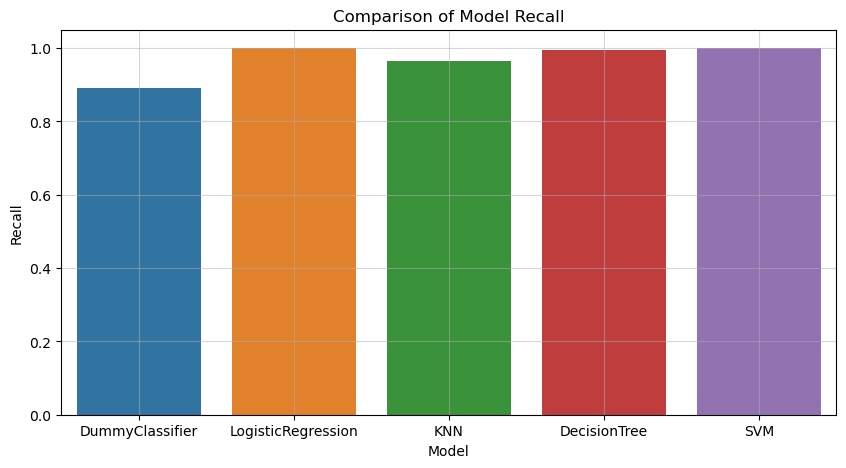

In [32]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Recall').set_title('Comparison of Model Recall')
# Display grid and set transparency
plt.grid(alpha=0.5)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<h3>Additional Feature Engineering</h3>

As it was discussed on the referenced research paper, some of the features of this dataset such as "gender" seem to be irrelavant to the outcome of the target variable. In the specific case of "gender", for example, the the distribution of of the target variable responses is almost equal. The authors mentioned that they were able to remove half of the attributes following this same reasoning.    

In fact, the following visualization shows how the same applies to the "age" feature:


Text(0.5, 1.0, 'Distribution of target variable based on age')

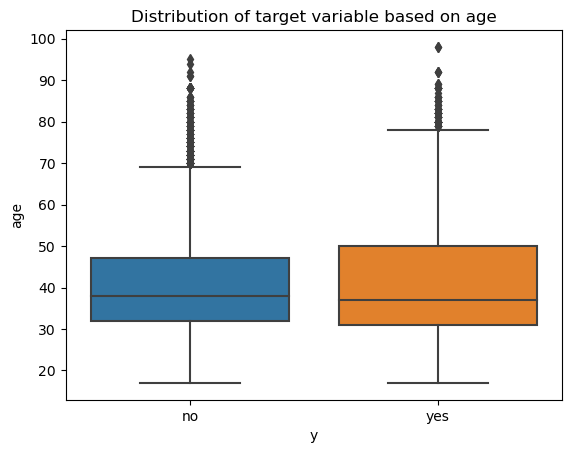

In [33]:
# Generate boxplot to show that "age" is not a relevant factor when determining the outcome of "y"  
sns.boxplot(contacts_df, y='age', x='y').set_title('Distribution of target variable based on age')

As it can be observed in the previous chart, the age is distributed almost equally across samples with values "yes" or "no" as the target variable.  

This leads us to believe that there are features that are more important than others when determining the outcome of the target variable. Therefore, we will leverage the **SelectFromModel** feature selector to help us select the most relevant features. For this we will expand the selection of columns to include all columns on the dataset (instead of the subset used previously), and convert into numerical data followed by a normalization process.

In [34]:
# Select all categorical data
selector = make_column_selector(dtype_include=object)
# Verify creation of selector instance 
selector

In [35]:
# Encode and scale  
transformer_all_columns = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), selector),
    remainder=StandardScaler()
)
# Verify creation of transformer instance
transformer_all_columns

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x140750d10>)])

Next, we will proceed with the instantiation of new train and test datasets that contain all columns obtained from the encoding and scaling process.    

In [36]:
# Create train / test data splits using all columnar data (encoded and scaled)
X_train, X_test, y_train, y_test = train_test_split(contacts_df.drop(['y'], axis = 1), contacts_df['y'], random_state = 42,
                                                   stratify = contacts_df['y'])

<h3>Hyperparameter Tuning and Gridsearch</h3>


In [37]:
# Package imports
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

To help us optmize our basic models, we will make use of **PipeLines** and **GridsSearchCV**. Also, to help make the process more efficient, we will define a custom function named "train_pipe" that will help us instantiate and train a pipe and get performance metrics. This function also provides a ROC visualization in addition to the confusion matrix: 

In [38]:
# Define a function that trains a pipeline and provide performance results
def train_pipe(pipe, X_train, y_train, X_test, y_test, display_visualizations = True):
    #Start timer
    start_time = perf_counter_ns()
    # Train pipe
    pipe.fit(X_train, y_train)
    #End timer
    end_time = perf_counter_ns()
    # Calculate 
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = pipe.predict(X_test)
    
    # Calculate train and test scores (accuracy)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    # Calculate precision and recall scores
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Determine if visualizations need to be displayed
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # Return pipe dictionary
    return {
        'pipe' : pipe, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

<h3> Optimize LogisticRegression Model</h3>

<p>We'll continue with the optimization of the LogisticRegression model. For this, we'll set the penalty mode to "l1" so that the model uses Lasso regularization. The reason for this is that Lasso minimizes the coefficients of the less important features to zero, which is ideal for feature selection. We'll also set the solver parameter to "liblinear" since it is the recommended solver for small datasets:</p>

In [39]:
# Instantiate LogisticRegression model with non-default parameters
lgr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter = 1000)

# Genaret model output
lgr_model

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Now, we instantiate the feature selector by passing the newly created logistc regresion model:

In [40]:
# Instantiate feature selector
extractor = SelectFromModel(lgr_model)

Next, we proceed with the training of the model by using the custom function **train_pipe**:

{'pipe': Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder=StandardScaler(),
                                    transformers=[('onehotencoder',
                                                   OneHotEncoder(drop='if_binary'),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x140750d10>)])),
                 ('selector',
                  SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                               penalty='l1',
                                                               random_state=42,
                                                               solver='liblinear'))),
                 ('lgr',
                  LogisticRegression(max_iter=1000, penalty='l1',
                                     random_state=42, solver='liblinear'))]),
 'fit_duration': 8133593593,
 'train_score': 0.910426985206047,
 'test_score': 0.91482

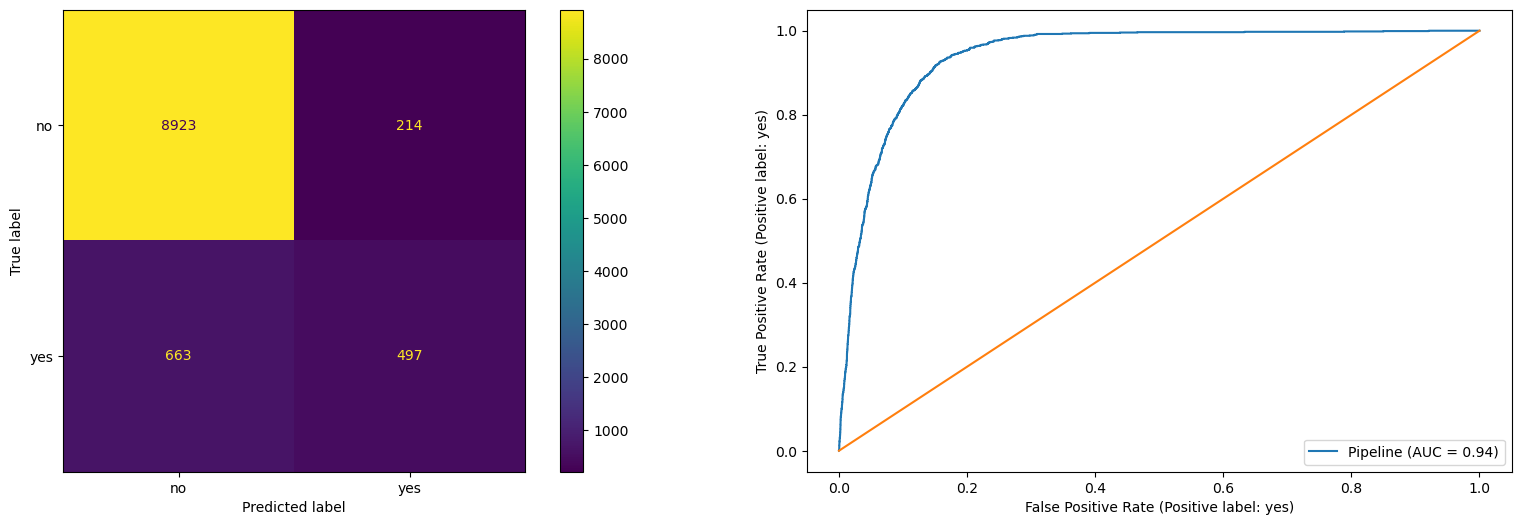

In [41]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pipe = train_pipe(
    Pipeline([
        ('transformer', transformer_all_columns),
        ('selector', extractor),
        ('lgr', lgr_model)
        
    ]), X_train, y_train, X_test, y_test)

# Genarate model output
lgr_pipe

For comparison purposes, let's bring back the results we obtained during our modeling process from the default (basic) models:


In [42]:
results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,13999565,0.803503,0.798873,0.881009,0.892365
1,LogisticRegression,298091239,0.889288,0.881519,0.881519,1.000000
2,KNN,29461882,0.869833,0.855977,0.882994,0.964416
3,DecisionTree,326415456,0.893594,0.877828,0.882647,0.993500
4,SVM,20368962004,0.889288,0.881519,0.881519,1.000000


As it is evident, the improved LogisticRegression model has improved significantly from the all the basic models. Mor importantly, neither the confusion matrix nor the recall score show signs of overfitting as they did on the basi model. We're going to store the results from the optimized models in a new variable named **optimized_results**:

In [43]:
# Instantiate optmized results variable
optimized_results = []

# Append results from the optimized LogisticRegression with feature selector model
optimized_results.append(['LogisticRegression with Feature Selector', lgr_pipe['fit_duration'], lgr_pipe['train_score'], lgr_pipe['test_score'], lgr_pipe['precision'], lgr_pipe['recall']])

Since we made use of the feature selector as part of the pipeline for the LogisticRegression model, we now can access the features that the model selected for us:

In [44]:
# Get feature names
feature_names = lgr_pipe['pipe'].named_steps['transformer'].get_feature_names_out() 

# Instantiate variable with the selected features
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe['pipe'].named_steps['selector'].get_feature_names_out()]]

# Remove the "__" word separators added by the selector 
clean_names = [i.split('__')[-1] for i in selected_features]

# Create a dataframe with the coefficients
coef_df = pd.DataFrame({
    'feature' : clean_names,
    'coefs' : abs(lgr_pipe['pipe'].named_steps['lgr'].coef_[0])
})

# Sort the order of the dataframe by the coeficient values in descending order
coef_df = coef_df.sort_values(by ='coefs', ascending = False)

# Get the latest 5 rows of the dataframe
coef_df.head()

,feature,coefs
42,emp.var.rate,2.501569
27,month_mar,1.748125
38,duration,1.206955
43,cons.price.idx,1.077669
35,poutcome_failure,0.824347


To help validate the selections from the future selector, we're going to make use of the **permutation_importance**  function as well:

Text(0.5, 0, 'Feature')

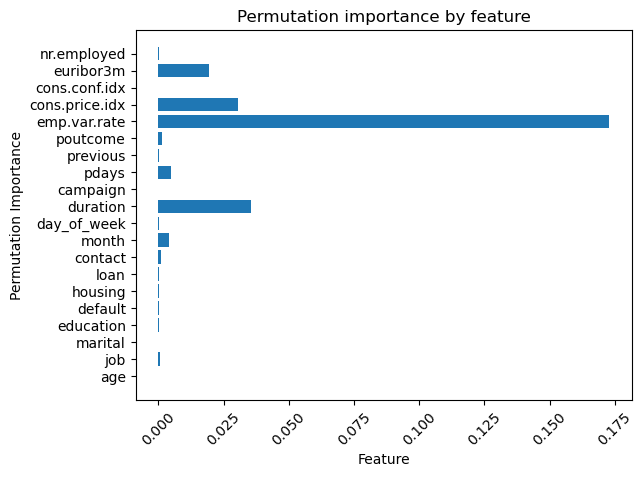

In [45]:
# Inspect data and calculate permutation importance (using standarized data) 
result = permutation_importance(lgr_pipe['pipe'], X_train, y_train, n_repeats=10,random_state=42)

# Genarate horizontal barchart to visualize results
plt.barh(y=X_train.columns.values, width=result.importances_mean)
plt.xticks(rotation=45)
plt.title("Permutation importance by feature")
plt.ylabel("Permutation Importance")
plt.xlabel("Feature")

As it can be observed from the results of the permutation importance selector, the most important features seem to be <i>emp-var.rate, duration, cons.price.idx and euroibor3m</i>. We're going to train another LogisticRegression pipe using only these features:

{'pipe': Pipeline(steps=[('transformer', StandardScaler()),
                 ('lgr',
                  LogisticRegression(max_iter=1000, penalty='l1',
                                     random_state=42, solver='liblinear'))]),
 'fit_duration': 184436737,
 'train_score': 0.9001974685183387,
 'test_score': 0.9020102942604642,
 'precision': 0.9170771756978654,
 'recall': 0.9780015322315858}

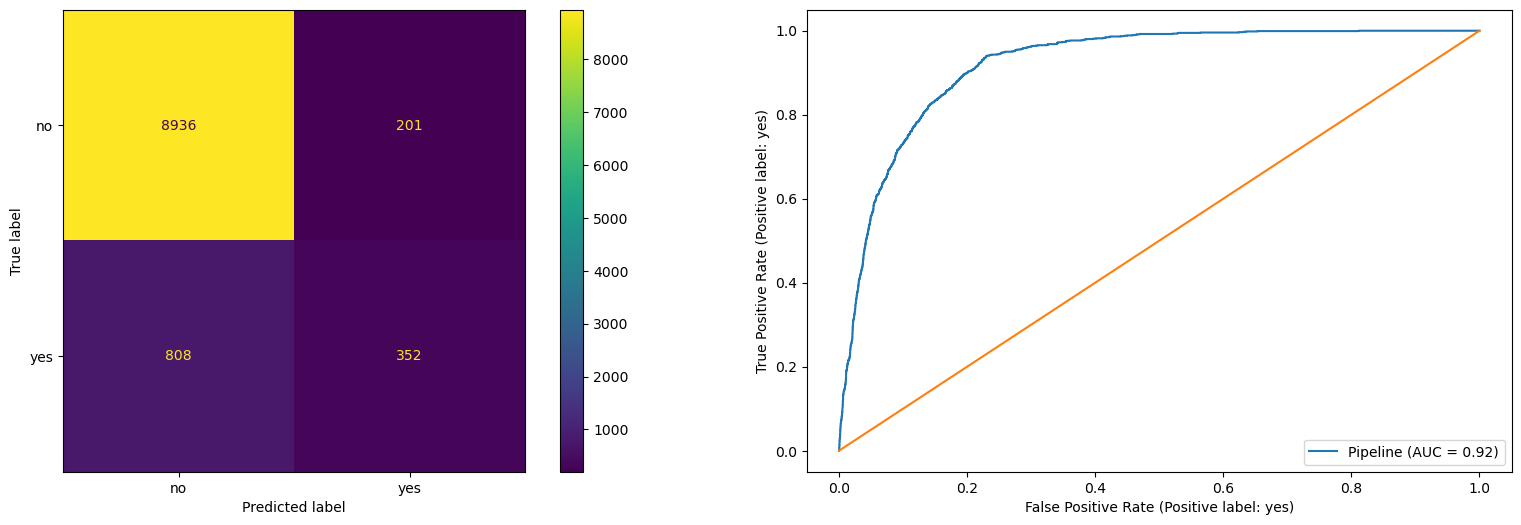

In [46]:
# Instantiate variable with selected features. 
selected_features = ['emp.var.rate', 'duration', 'cons.price.idx', 'euribor3m']

# Instantiate and train logistic regression model using only the selected features
trained_lgr_pipe = train_pipe(
    Pipeline([
        ('transformer', StandardScaler()),
        ('lgr', lgr_model)
        
    ]), X_train[selected_features], y_train, X_test[selected_features], y_test)

# Generate model output
trained_lgr_pipe


From the results obtained, we can observe a loss in performance when compared to the previous model (with the feature selector), although the recall is slighty higher on this new model. We're going to store these results in our **optimized_results** array:

In [47]:
optimized_results.append(
    ['LogisticRegression Pipe (permutation importance)', 
     trained_lgr_pipe['fit_duration'],
     trained_lgr_pipe['train_score'], 
     trained_lgr_pipe['test_score'], 
     trained_lgr_pipe['precision'], 
     trained_lgr_pipe['recall']]
)


From the results obtained, we can observe a loss in performance when compared to the previous model (with the feature selector), although the recall is slighty higher on this new model. 

This is a good time to reference an important comment provided on the data description regarding **duration**:

"<i>Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</i>"

Based on that comment, it seems reasonable to also train a model that does not include the duration feature: 

{'pipe': Pipeline(steps=[('transformer', StandardScaler()),
                 ('lgr',
                  LogisticRegression(max_iter=1000, penalty='l1',
                                     random_state=42, solver='liblinear'))]),
 'fit_duration': 205056731,
 'train_score': 0.8870221099996762,
 'test_score': 0.8871515975526852,
 'precision': 0.8885316184351554,
 'recall': 0.9980299879610376}

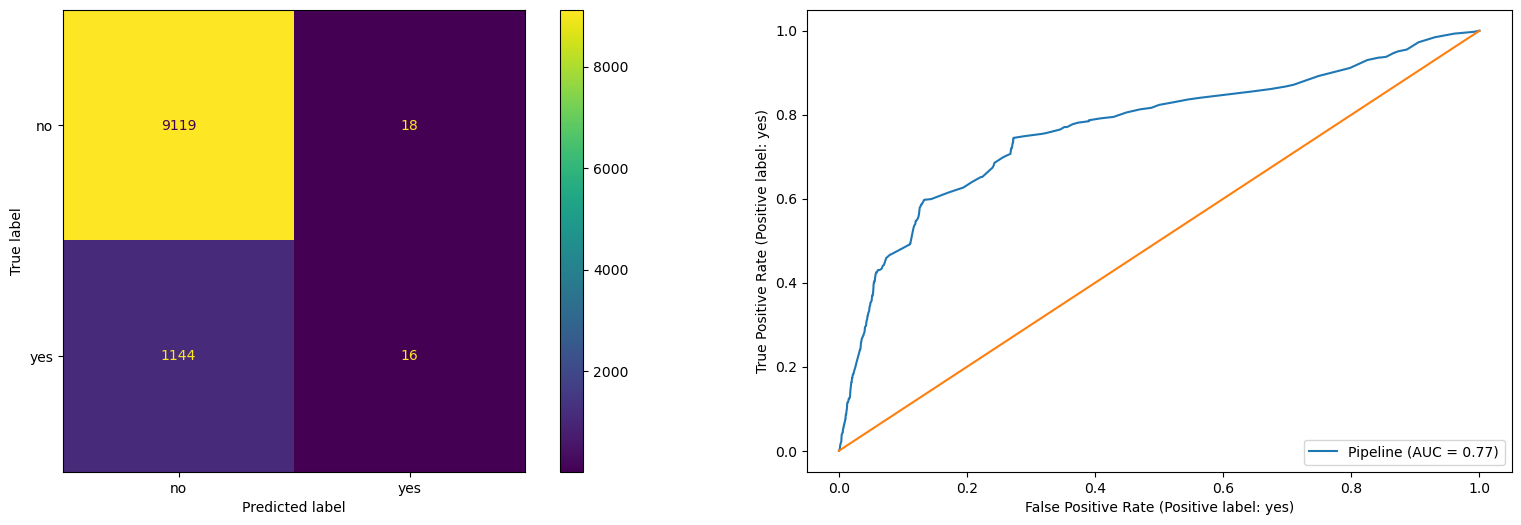

In [48]:
# Instantiate variable that holds the selected features except "duration":
selected_features_exclude_duration = ['emp.var.rate', 'cons.price.idx', 'euribor3m']

# Instantiate and train logistic regresion pipe
trained_lgr_pipe_no_duration = train_pipe(
    Pipeline([
        ('transformer', StandardScaler()),
        ('lgr', lgr_model)        
    ]), X_train[selected_features_exclude_duration], y_train, X_test[selected_features_exclude_duration], y_test)

# Generate output of the model
trained_lgr_pipe_no_duration


It is clear that by removing the **duration** feature, the performance of the model has degraded when compared to the two previous models. Now, before we continue our optimization process, we need to decide on what metric to use as our performance metric.

We'll store these results in our **optimized_results** array:
 

In [49]:
# Append results from the optimized LogisticRegression with no duration
optimized_results.append(
    ['LogisticRegression Pipe (no duration)', 
     trained_lgr_pipe_no_duration['fit_duration'],
     trained_lgr_pipe_no_duration['train_score'], 
     trained_lgr_pipe_no_duration['test_score'], 
     trained_lgr_pipe_no_duration['precision'], 
     trained_lgr_pipe_no_duration['recall']]
)


As we discovered during the data exploration phase, this dataset is highly unbalanced. This is important to in this analysis since in the case os imbalanced datasets, accuracy does not necessarily give a good assessment of the quality of a model. Furthermore, since the goal of this analysis is to optimize the campaign performance, it seems logical that we focus the effort on those customers that have a high probability of accepting the deposit. This means, we should not focus on high recall but instead high precision. At the same time, we don't want the model to so precise that then results in high recall. For this reason, we should focus on a metric that give us an optimal balance between precision and recall. 


<h3> Further Optimization via GridSearch</h3>


To further optimize the models, we're going to use the Area Under the Receiver Operating Characteristic Curve (ROC AUC). This value has been available to us from the visualizations we've been generating on each iteration. Thus far, the LinearRegression classifier with feature selector has been resulted in the highest AUC at 0.94. Therefore, this will be our baseline moving forward.

To help make the process more efficient, we're going to define another custom function that will let us instantiate and train grids given a pipe and a dictionary of hyperparameters to try. Notice that by default, we'll be using the 'roc_auc' estimator to select the optimal paramaters:

In [50]:
# Define a function that trains a pipeline and provide performance results
def train_grid(pipe, param_grid, X_train, y_train, X_test, y_test, scoring = 'roc_auc', display_visualizations = True):
    
    # Instantiate grid
    grid = GridSearchCV(pipe, param_grid=param_grid, scoring = scoring)
    
    # start timer
    start_time = perf_counter_ns()
    # train grid
    grid.fit(X_train, y_train)
    #stop timer
    end_time = perf_counter_ns()
    # calculate duration of fit process
    duration = end_time - start_time
    
    # generate predictions
    prediction_test = grid.predict(X_test)
    
    # calculate accuracy
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)

    # calculate precision and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # If needed, display visualizations
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # return grid results
    return {
        'grid' : grid, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

<h4>KNN Classifier via GridSearch</h4>

We're now ready to use our custom fuction to train a grid. We'll use the KNN classifier and fit it with the selected features (from the permutation importance selector). Notice we'll use the GridSearch to help use identify the best <i>n_neighbors</i> setting:

{'grid': GridSearchCV(estimator=Pipeline(steps=[('transformer', StandardScaler()),
                                        ('knn', KNeighborsClassifier())]),
              param_grid={'knn__n_neighbors': range(1, 40, 2)},
              scoring='roc_auc'),
 'fit_duration': 11465578271,
 'train_score': 0.9456698103831963,
 'test_score': 0.9384943465938039,
 'precision': 0.9380653400021284,
 'recall': 0.9647586735252272}

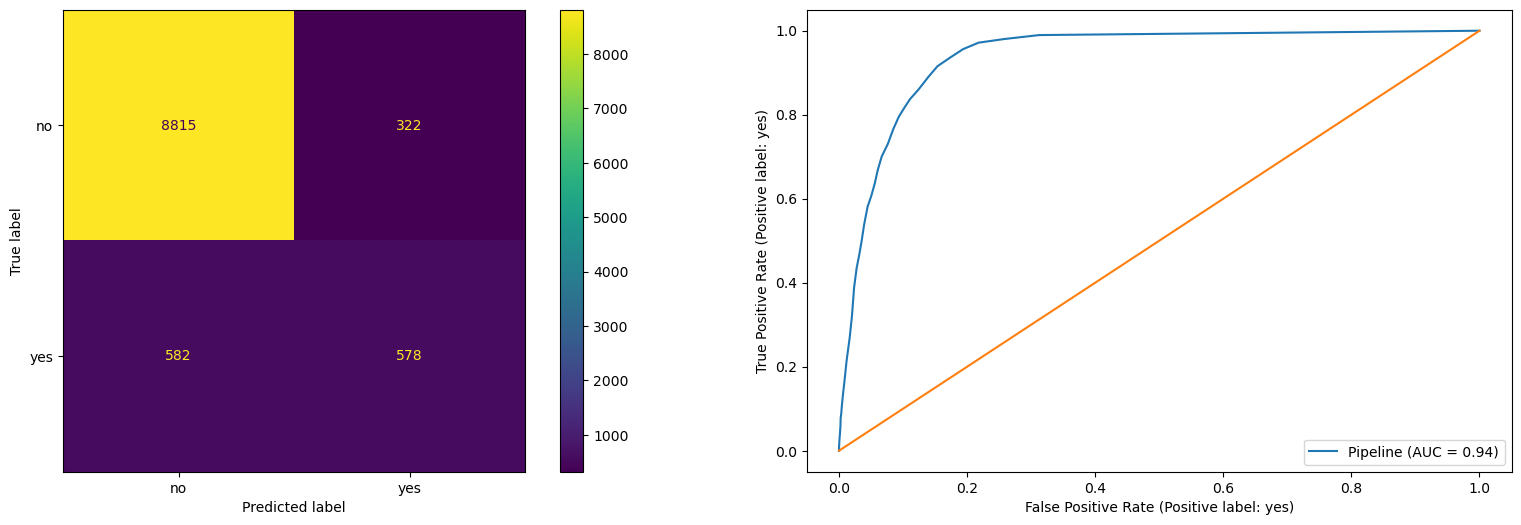

In [51]:
# Create pipeline with standard scaler as the transformer and the KNN classifier as the estimator  
knn_pipe = Pipeline([
        ('transformer', StandardScaler()),
        ('knn', KNeighborsClassifier())        
    ])

# Instantiate and train grid
knn_grid = train_grid(knn_pipe, {'knn__n_neighbors': range(1, 40, 2)}, 
    X_train[selected_features], 
    y_train,
    X_test[selected_features], 
    y_test,
    scoring = 'roc_auc'
)

# Display model output
knn_grid

Already we can see how the GridSearch was able to identify parameters that improved the basic KNN model. Moreover, the AUC metric displayed on the visualization also matches the 0.94 score we obtained from the LogisticRegression model (the one with the SelecteFromModel selector). We're going to add these results to our **optimized_results** array:  

In [52]:
# Append results from the optimized LogisticRegression with no duration
optimized_results.append(
    ['KNN Grid', 
     knn_grid['fit_duration'],
     knn_grid['train_score'], 
     knn_grid['test_score'], 
     knn_grid['precision'], 
     knn_grid['recall']]
)


We can also query what the Grid found as the optimal <i>n_neighbors</i> setting:  

In [53]:
# Display optimal n_neighbors paramater:
print("Optimal 'n_neighbors' parameter: ", knn_grid['grid'].best_params_['knn__n_neighbors'])

Optimal 'n_neighbors' parameter:  39


Now, it seems reasonable that we should include another iteration that excludes the <i>duration</i> feature to compare the results: 

{'grid': GridSearchCV(estimator=Pipeline(steps=[('transformer', StandardScaler()),
                                        ('knn', KNeighborsClassifier())]),
              param_grid={'knn__n_neighbors': range(1, 40, 2)},
              scoring='roc_auc'),
 'fit_duration': 13009512920,
 'train_score': 0.7848836694891765,
 'test_score': 0.7864413072275288,
 'precision': 0.9057385330369772,
 'recall': 0.9811754405165809}

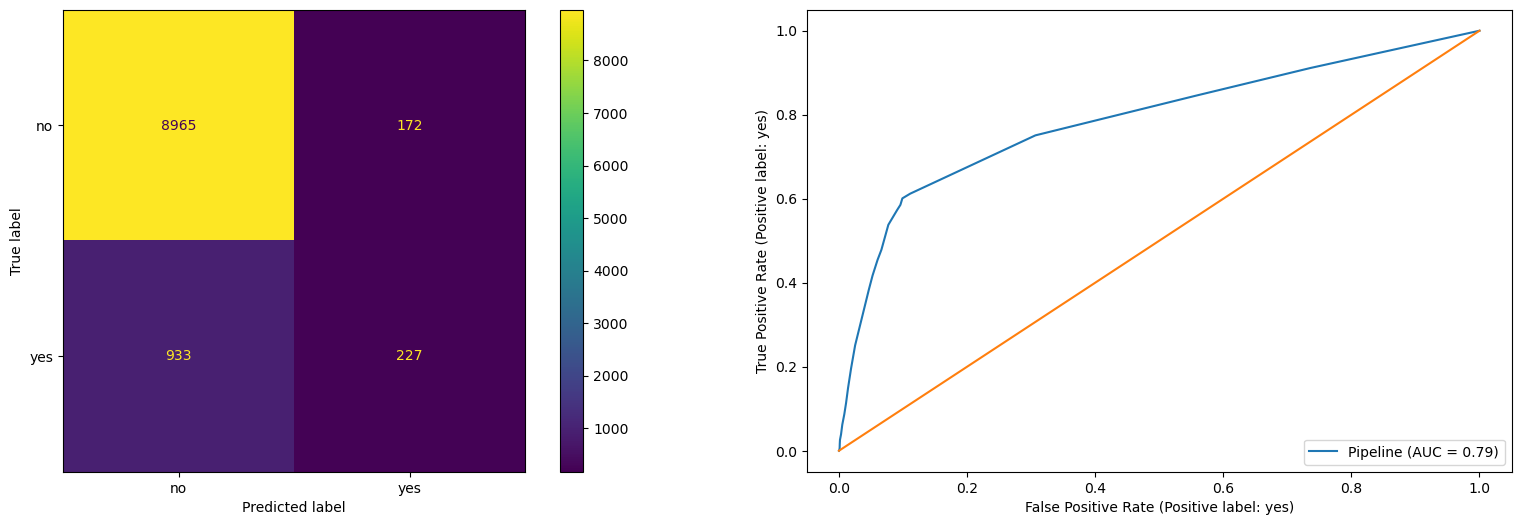

In [54]:
# Instantiate and train grid that excludes 'duration' as a feature:  
knn_grid_no_duration = train_grid(knn_pipe, {'knn__n_neighbors': range(1, 40, 2)}, 
    X_train[selected_features_exclude_duration], 
    y_train,
    X_test[selected_features_exclude_duration], 
    y_test,
    scoring = 'roc_auc'
)

# Display model output
knn_grid_no_duration

We can observe how by removing the <i>duration</i> feature, the performance of the KNN also was degraded. More importantly, the AUC was downgraded to 0.79, as it can be seen on the ROC AUC chart. We'll include these results in our **optimized_results** array:

In [55]:
optimized_results.append(
    ['KNN Grid (no duration)', 
     knn_grid_no_duration['fit_duration'],
     knn_grid_no_duration['train_score'], 
     knn_grid_no_duration['test_score'], 
     knn_grid_no_duration['precision'], 
     knn_grid_no_duration['recall']]
)

<h4>DecisionTree Classifier via GridSearch</h4> 

Following a similar approach to what we did for the KNN classifier, we're going to proceed to find the optimal parameters for the DecisionTree classifier. In this case, we're passing an array of values so that the grid can determine the optimal parameters for <i>min_impurity_decrease</i> (which controls if a node should be splitted based on the amount of impurity that will result from such split), <i>max_depth</i> (the maximum depth of a tree) and <i>min_split</i>(which controls the minimum number of samples required to split an internal node). Notice that we will continue to use the 'roc_auc' scoring metric in our Grid:     

{'grid': GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
              param_grid={'max_depth': [2, 5, 10],
                          'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                          'min_samples_split': [0.1, 0.2, 0.05]},
              scoring='roc_auc'),
 'fit_duration': 7999868231,
 'train_score': 0.8248318382124469,
 'test_score': 0.8226670264517516,
 'precision': 0.8873458288821987,
 'recall': 1.0}

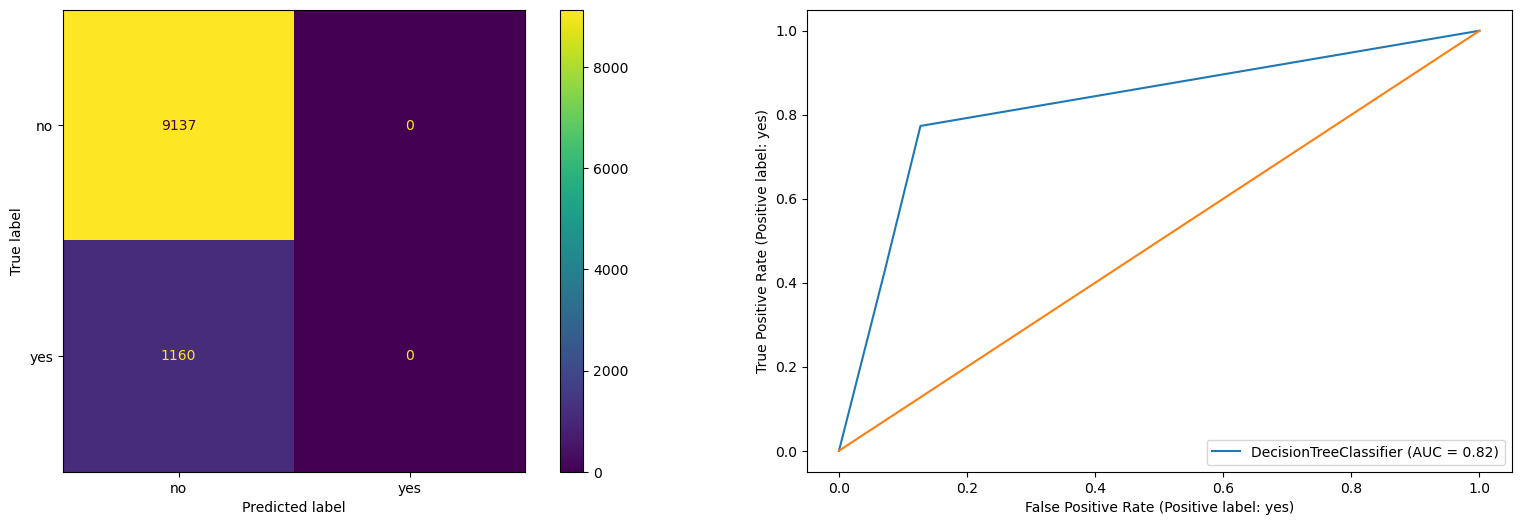

In [56]:
# Instanttiate and train the DecisionTree classier using the custom function:
dtree_grid = train_grid(
    DecisionTreeClassifier(random_state=42), 
    {
        'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
        'max_depth': [2, 5, 10],
        'min_samples_split': [0.1, 0.2, 0.05]
    },
    X_train[selected_features], 
    y_train,
    X_test[selected_features], 
    y_test,
    scoring = 'roc_auc'
)

# Display outut from model
dtree_grid

We can observe from the results above that not only the model degraded in performance when compared to the basic model, but also it was not able to predict any true possitive (TP) or false negative (FN) values. This is an indication of the model being overfitted or that the parameters provided to the grid were not sufficient to generate a better estimator than the basic model.  

We will still add these results to our **optimized_results** array:

In [57]:
optimized_results.append(
    ['DecisionTree Grid', 
     dtree_grid['fit_duration'],
     dtree_grid['train_score'], 
     dtree_grid['test_score'], 
     dtree_grid['precision'], 
     dtree_grid['recall']]
)

For consistency, we'll proceed to train a model that does not include the duration feature:

{'grid': GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
              param_grid={'max_depth': [2, 5, 10],
                          'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                          'min_samples_split': [0.1, 0.2, 0.05]},
              scoring='roc_auc'),
 'fit_duration': 7498971809,
 'train_score': 0.6770207876525784,
 'test_score': 0.6812189355141846,
 'precision': 0.8873458288821987,
 'recall': 1.0}

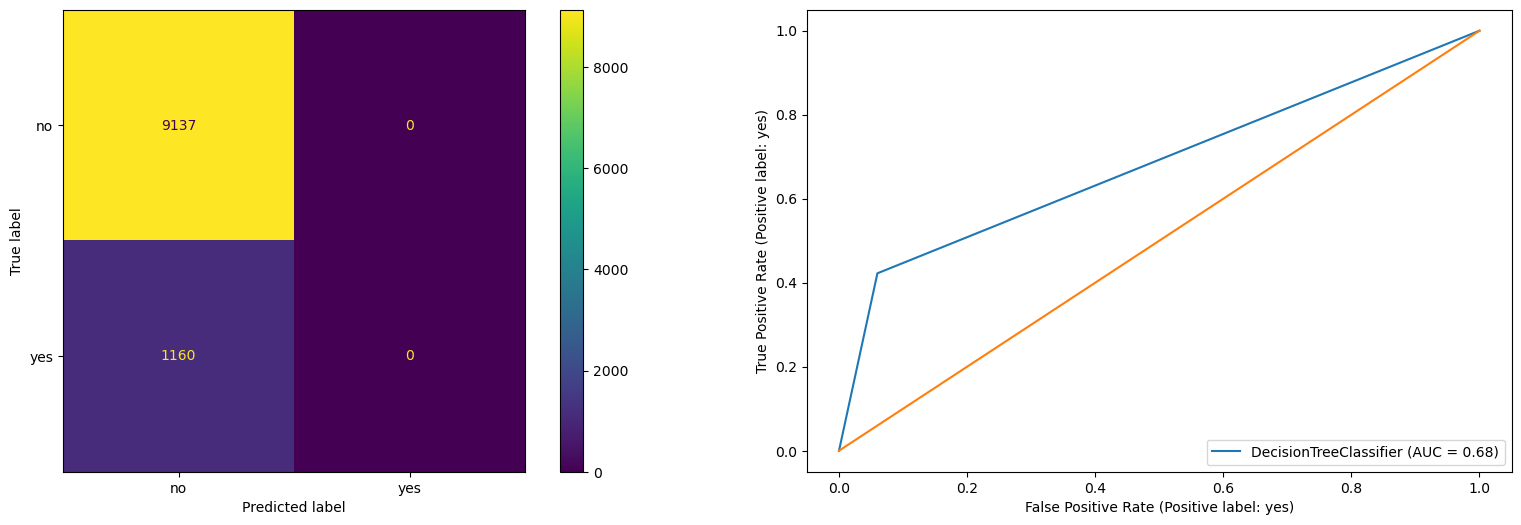

In [58]:
# Instanttiate and train the DecisionTree classier using the custom function. Do not include 'duration':
dtree_grid_no_duration = train_grid(
    DecisionTreeClassifier(random_state=42), 
    {
        'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
        'max_depth': [2, 5, 10],
        'min_samples_split': [0.1, 0.2, 0.05]
    },
    X_train[selected_features_exclude_duration], 
    y_train,
    X_test[selected_features_exclude_duration], 
    y_test,
    scoring = 'roc_auc'
)

# Display model output
dtree_grid_no_duration

As expected, the performance of this last decision was significantly degraded when removing the duration feature. Moreover, the same observations apply in regards to the absence of true positive and false negative predictions, which results in a recall score of 1.0. We're going to add the results to our **optimized_results** array:

In [59]:
optimized_results.append(
    ['DecisionTree Grid (no duration)', 
     dtree_grid_no_duration['fit_duration'],
     dtree_grid_no_duration['train_score'], 
     dtree_grid_no_duration['test_score'], 
     dtree_grid_no_duration['precision'], 
     dtree_grid_no_duration['recall']]
)

<h4>Support Vector Machine via GridSearch</h4> 


IMPORTANT: when trying to use the GridSearch with the SVC classifier, the machine where these analysis was made was not able to generate results. Specifically, the kernel became unresponsive on every attempt. This was somehow expected considering the significanty higher time to train it took for the basic SVC model when compared to its counterpart during the modeling process.

For reference, the code is provided below (intentionally commented out) in case the reader desires to attempt on a more effiient machine:

In [60]:
## Instantiate and train grid using SVC classifier
# svc_grid = train_grid(
#     SVC(), 
#     {
#         'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
#         'gamma': [0.1, 1.0, 10.0, 100.0]
#     },
#     X_train[selected_features], 
#     y_train,
#     X_test[selected_features], 
#     y_test,
#     scoring = 'roc_auc'
# )

# Display model output
# svc_grid


To summarize the results of the optimization process, we'll create a dataframe with the obtained results: 

In [61]:
optimized_results_df = pd.DataFrame(optimized_results, columns=results_df.columns)
optimized_results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,LogisticRegression with Feature Selector,8133593593,0.910427,0.914830,0.930837,0.976579
1,LogisticRegression Pipe (permutation importance),184436737,0.900197,0.902010,0.917077,0.978002
2,LogisticRegression Pipe (no duration),205056731,0.887022,0.887152,0.888532,0.998030
3,KNN Grid,11465578271,0.945670,0.938494,0.938065,0.964759
4,KNN Grid (no duration),13009512920,0.784884,0.786441,0.905739,0.981175
5,DecisionTree Grid,7999868231,0.824832,0.822667,0.887346,1.000000
6,DecisionTree Grid (no duration),7498971809,0.677021,0.681219,0.887346,1.000000


<h1>Deployment</h1>

As requested, we have performed an analysis of a dataset containing marketing camppaing data provided by a Portuguese bankink institution. The goal of the analysis was to create a prediction model that could help predict the customers with higher probability of making a deposit, and therefore improve the results of marketing campaigns sponsored by the institution.  

After several iterations of data exploration, feature engineering, modeling and optimization processes, the results from this analysis led us to the conclusion that the LogisticRegression model through a pipeline using a transformer for data encoding and data normalization, together with a feature selector that benefits from a L1 "Lasso" penalizer is the best model to predict the outcome of the target variable "y". This conclusion was mainly based on the Area Under the Receiver Operating Characteristic Curve (ROC AOC) metric, but also on the accuracy of the predictions on the test data. 

The following dataframe summarizes the metrics collected for the top performing classifiers:

In [62]:
final_results_df = optimized_results_df.loc[[0, 3]]
final_results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,LogisticRegression with Feature Selector,8133593593,0.910427,0.914830,0.930837,0.976579
3,KNN Grid,11465578271,0.945670,0.938494,0.938065,0.964759


Additionally, as it was captured by the ROC AUC visualization during the optimization phase, Area Under the Receiver Operating Characteristic Curve (ROC AUC) metric showed 0.94 for both of these classifiers. However, as it can be seen on the table above, the LogisticRegression classifier outperforms the KNN classifier in all the other performance metrics, including time to train (fit_duration).

The analysis also let us obtain a clear idea of the most relevant features that affect the outcome of the target variable. Below, we include some visualizations that help illustrate the disbalances of the target variable across the selected features:

Text(0.5, 1.0, 'Distribution of target variable based on "Employment Variation Rate"')

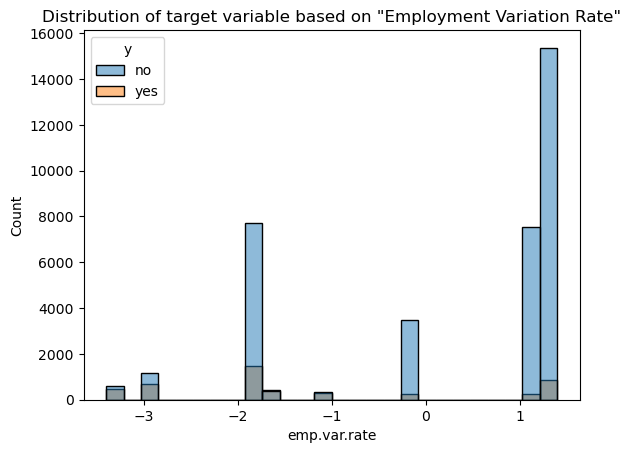

In [63]:
# Generate histogram plot with emp.var.rate data
sns.histplot(data=contacts_df, x='emp.var.rate', hue='y').set_title('Distribution of target variable based on "Employment Variation Rate"')

The chart above shows that big concentration of "no" values when the employment variation rate is above 1, while the highest concentration of "yes" values seem to happen when the employment variation rate is close to -2. 

Text(0.5, 1.0, 'Distribution of target variable based on "Consumer Price Index"')

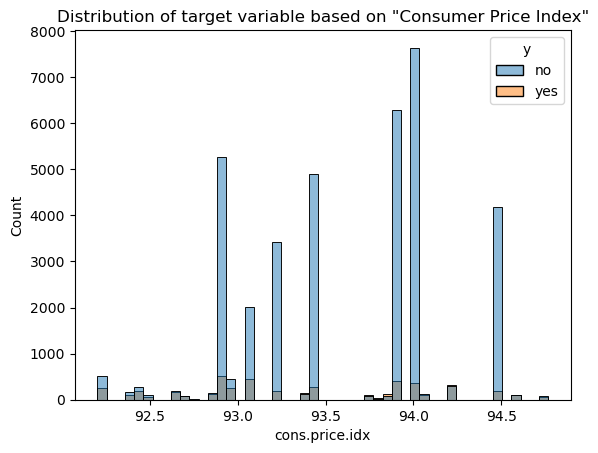

In [64]:
# Generate histogram plot with cons.price.idx data
sns.histplot(data=contacts_df, x='cons.price.idx', hue='y').set_title('Distribution of target variable based on "Consumer Price Index"')

The visualizaton above helps visualize that the largest concentration of "no" values happens when the consumer price index is around 94.0 

Text(0.5, 1.0, 'Distribution of target variable based on "Euribor 3 month rate"')

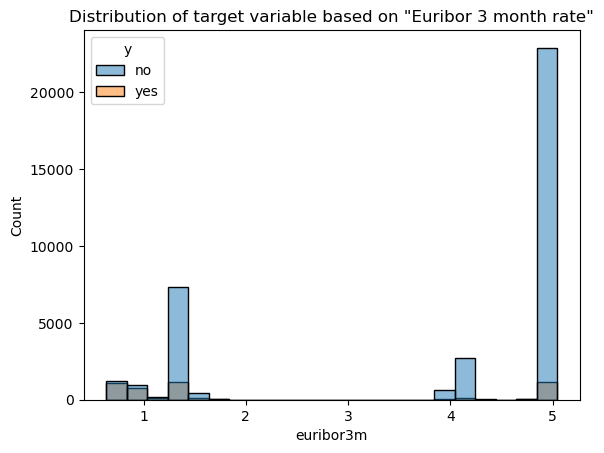

In [65]:
# Generate histogram plot with euribor3m data
sns.histplot(data=contacts_df, x='euribor3m', hue='y').set_title('Distribution of target variable based on "Euribor 3 month rate"')

The visualizaton above helps visualize that the largest concentration of "no" values happens when the Euribor 3 month rate is around 5, while the "yes" values seem to concenrate around the 0.5 and 1.5 range.   

Text(0.5, 1.0, 'Distribution of target variable based on "Duration"')

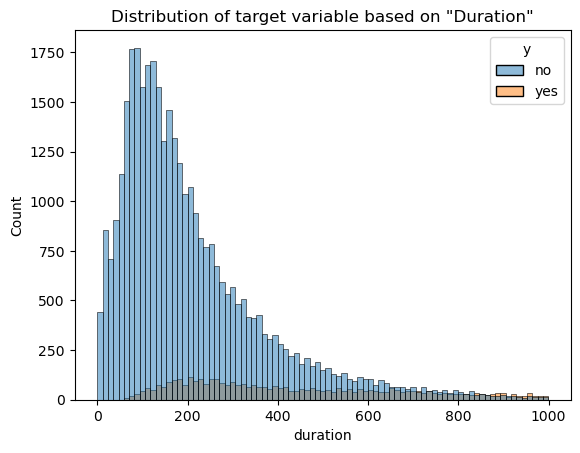

In [66]:
# Generate histogram plot with duration data
sns.histplot(data=contacts_df[contacts_df['duration'] < 1000], x='duration', hue='y').set_title('Distribution of target variable based on "Duration"')

The visualization above is specially important since it clearly shows how the distribution of the target variable seems to balance as the duration increases. Notice how between 0 to 600 days the 'no' disbalance in the target value is prominent. However, as duration increases, the distribution becomes more balanced, even favoring the 'yes' values. The visualization below helps illustrate this fact:

Text(0.5, 1.0, 'Distribution of target variable based on "Duration" - More than 600 days')

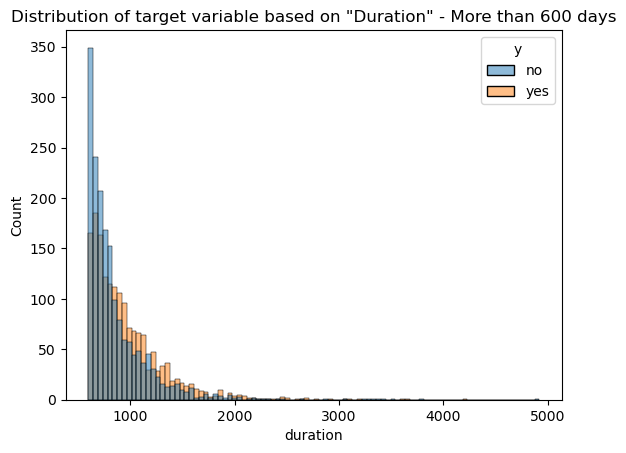

In [67]:
# Generate histogram plot with duration data (more than 600 days)
sns.histplot(data=contacts_df[contacts_df['duration'] > 600], x='duration', hue='y').set_title('Distribution of target variable based on "Duration" - More than 600 days')

As it relates to duration, it seems like customers are more likely to make a deposit (respond to the offer) when they're not contacted too frequently. 

<h2>Audience profile</h2>

The following section aims to help the reader understand some demographic characteristics of the customers that made deposits (target variable = 'yes'). Although the analysis showed that these features are not as relevant, we still believe there's value in the information presented below, specially since it can serve as a basis to target customers more efficently:

In [68]:
contacts_df[contacts_df['y'] == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The summarized statistics presented above serve as validation from the previously shown visualizations. For example, notice how the average last contact duration is around 553 days, the employment variation rate is around -1.2, the consumer price index is around 93.5 and Euribor 3 month variation is around 2.12. 

Text(0.5, 1.0, 'Heat map showing concentration of "yes" responses by job and age')

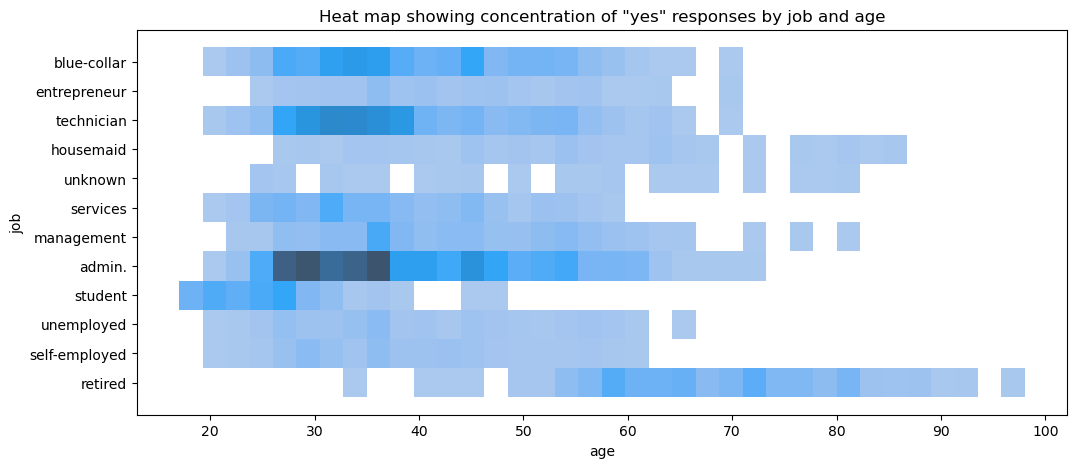

In [69]:
# Generate heatmap with job and age data
plt.figure(figsize=(12,5))
sns.histplot(contacts_df[contacts_df['y'] == 'yes'], x='age', y='job').set_title('Heat map showing concentration of "yes" responses by job and age')

As mentioned, even though neither 'age' nor 'job' were features that ranked high during our analysis, it is important to notice that there seems to be a higher engagement from admin users of age 25 through around 38.

Text(0.5, 1.0, 'Heat map showing concentration of "yes" responses by education and age')

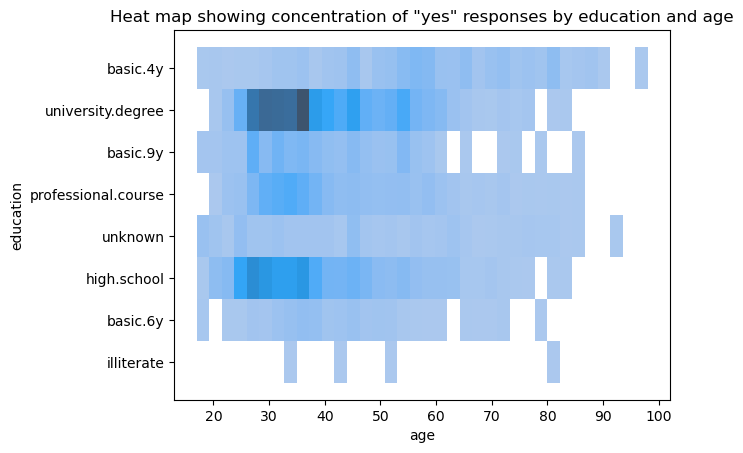

In [70]:
# Genarate heatmap with age and education data
sns.histplot(contacts_df[contacts_df['y'] == 'yes'], x='age', y='education').set_title('Heat map showing concentration of "yes" responses by education and age')

Also notice how there seems to be a higher engagement from customers that hold a university degree and that are of age 25 through about 35.

Text(0.5, 1.0, 'Heat map showing concentration of "yes" responses by housing and age')

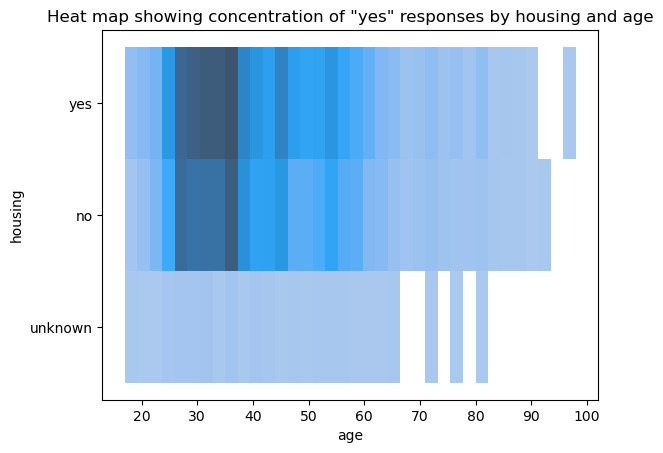

In [71]:
# Genarate heatmap with job and housing data
sns.histplot(contacts_df[contacts_df['y'] == 'yes'], x='age', y='housing').set_title('Heat map showing concentration of "yes" responses by housing and age')

Lastly, the visualization above shows that as with age and gender, there doesn't seem to be any relevant different between customers that own their houses and those who don't. 

<h1> Conclusion</h1>


As supported by the results of the analysis, we conclude that our optimized LogisticRegression classifier is the best model to predict if a customer will make a deposit. Furthermore, we identified that macroeconomic data such as Employment Variation rate, Consumer Price Index, Euribor 3 month rate are among the most important features when modeling the classifier. As it comes to duration, even though it was also rated as a highly influential feature for the outcome of the target variable, a warning was provided by the authors of the dataset indicating that caution must be taken when creating predictive models due to ambiguity of this feature. For that reason, through the optimization process we made sure to provide alternative models were the duration duration feature was not set.

However, as it was also pointed out, results were inconclusive when attempting to optimize the Decision Tree classifier with a GridSearch, as well as the inability to optmize the SVC classifier due to computing limitations. Therefore, it may be advisable to perform further optimizations to this analysis increased computing resources become available.